# Analysis on TLD for fingerprining Scripts(Audio, Canvas, Font, WebRTC)

### What does Top-Level Domain (TLD) mean?

Top-level domain (TLD) refers to the last segment of a domain name, or the part that follows immediately after the "dot" symbol. Examples of some of the popular TLDs include .com, .org, .net, .gov, .biz and .edu. 

A top-level domain recognizes a certain element regarding the associated website, such as its objective (business, government, education), its owner, or the geographical area from which it originated.

Each TLD includes an independent registry controlled by a specific organization, which is managed under the guidance of the Internet Corporation for Assigned Names and Numbers (ICANN).

ICANN recognizes the following types of TLDs:

- Generic Top-Level Domains (gTLD): These are the most popular types of TDLs. Some examples include ".edu" for educational sites and ."com" for commercial sites. These types of TLDs are available for registration.

- Country-Code Top-Level Domains (ccTLD): Every ccTLD recognizes a specific country and is generally two letters long. For example, the ccTLD for Australia is ".au".

- Sponsored Top-Level Domains (sTLD): These TLDs are supervised by private organizations.

- Infrastructure Top-Level Domains: There is only one TLD in this category, which is ".arpa". The Internet Assigned Numbers Authority controls this TLD for the Internet Engineering Task Force (IETF).



In [2]:
import pandas as pd
import dask.dataframe as dd
from dask.distributed import Client

Client()

/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:42809 Dashboard: http://127.0.0.1:38223/status,Cluster Workers: 4 Cores: 12 Memory: 8.25 GB


In [3]:

df = pd.read_parquet(
     '/home/soumya/Dataset/sample_0.parquet', engine='pyarrow',
    columns=['script_url']
)
# Finding the unique scripts
script_url_unique=df.script_url.unique()
script_url_unique[0:100]

array(['https://vk.com/js/api/xdm.js?1449919642',
       'https://vk.com/js/al/aes_light.js?592436914',
       'https://cpro.baidustatic.com/cpro/ui/noexpire/js/4.0.0/adClosefeedbackUpgrade.min.js',
       'https://apis.google.com/js/plusone.js?_=1513387467959',
       'https://apis.google.com/_/scs/apps-static/_/js/k=oz.gapi.en_US.u6kjN8qjK4c.O/m=plusone/rt=j/sv=1/d=1/ed=1/am=AQ/rs=AGLTcCNyWKI1jWTPxsTegkpGnwIGUlr0VQ/cb=gapi.loaded_0',
       'https://assets.adobedtm.com/caacec67651710193d2331efef325107c23a0145/satelliteLib-78cf42deb149c9766cbaaa6151e252b9b67c0200.js',
       'https://assets.adobedtm.com/caacec67651710193d2331efef325107c23a0145/s-code-contents-69cce4f42ae039e7c3974e2fa4292c5e7ad592ab.js',
       'https://www.google-analytics.com/analytics.js',
       'https://www.google-analytics.com/plugins/ua/linkid.js',
       'https://www.canada.ca/etc/designs/canada/wet-boew/js/wet-boew.min.js',
       'https://www.canada.ca/etc/designs/canada/wet-boew/js/deps/jquery.magnific-popu

In [4]:
len(script_url_unique)

166862

In [5]:
# Finding the netloc of unique scripts. 
from urllib.parse import urlparse

EMPTY_STRING = 'EMPTY_STRING'

def get_netloc(x):
    p = urlparse(x)
    val = p.netloc
    if len(val) == 0:
        val = EMPTY_STRING
    return val

script_netloc_unique= df.script_url.apply(get_netloc).unique()
script_netloc_uniquedf=pd.DataFrame(script_netloc_unique)
script_netloc_unique[0:100]

array(['vk.com', 'cpro.baidustatic.com', 'apis.google.com',
       'assets.adobedtm.com', 'www.google-analytics.com', 'www.canada.ca',
       's0.2mdn.net', 'g.alicdn.com', 'maniform.world.tmall.com',
       'uaction.alicdn.com', 'z.moatads.com', 'platform.twitter.com',
       'www.coches.net', 'c.ccdn.es', 'tags.tiqcdn.com',
       'cdn.optimizely.com', 'static.criteo.net',
       'jssdk.pulse.schibsted.com', 'sb.scorecardresearch.com',
       'script.hotjar.com', 'acdn.adnxs.com', 'tag.aticdn.net',
       'sslwidget.criteo.com', 'pos.baidu.com', 'www.facebook.com',
       'cbjs.baidu.com', 's7.addthis.com', 'resources.infolinks.com',
       'pagead2.googlesyndication.com', 'securepubads.g.doubleclick.net',
       'choices.trustarc.com', 'www.ard.de', 'script.ioam.de',
       'resources.host.bannerflow.com', 'api.flocktory.com',
       'www.googletagmanager.com', 'www.googleadservices.com',
       'mc.yandex.ru', 'static.mvideo.ru', 'top-fwz1.mail.ru',
       'cdn.dumedia.ru', 'api.mo

In [6]:
len(script_netloc_unique)

20163

In [7]:

dff = dd.read_parquet(
     '/home/soumya/Dataset/sample_0.parquet', engine='pyarrow',
    columns=['script_url']
)
def get_netloc(x):
    p = urlparse(x)
    val = p.netloc
    if len(val) == 0:
        val = EMPTY_STRING
    return val
def get_end_of_net_loc(x):
    splits = x.split('.')
    val = splits[-1]
    return val

dff['script_netloc'] = dff.script_url.apply(get_netloc)
dff['script_netloc_uniquedf']=dff.script_netloc.apply(get_end_of_net_loc)
dff.head(20)


/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/dask/dataframe/core.py:2285: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


,script_url,script_netloc,script_netloc_uniquedf
call_id,,,
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__0,https://vk.com/js/api/xdm.js?1449919642,vk.com,com
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__1,https://vk.com/js/api/xdm.js?1449919642,vk.com,com
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__2,https://vk.com/js/al/aes_light.js?592436914,vk.com,com
1_00006b1ad6ce7a5b2b81a8ef96f0778853ea6d81a97693d85a52790c.json__0,https://cpro.baidustatic.com/cpro/ui/noexpire/...,cpro.baidustatic.com,com
1_0000813d43acf1fe219ada01597cfb1d5dc9c12b61f343c6cfac362b.json__0,https://apis.google.com/js/plusone.js?_=151338...,apis.google.com,com
1_0000813d43acf1fe219ada01597cfb1d5dc9c12b61f343c6cfac362b.json__1,https://apis.google.com/_/scs/apps-static/_/js...,apis.google.com,com
1_0000813d43acf1fe219ada01597cfb1d5dc9c12b61f343c6cfac362b.json__2,https://apis.google.com/_/scs/apps-static/_/js...,apis.google.com,com
1_0000e6f79b14876a8c7ddfcb7782502f2aa02e7803782d46f3bbfea7.json__0,https://assets.adobedtm.com/caacec67651710193d...,assets.adobedtm.com,com
1_0000e6f79b14876a8c7ddfcb7782502f2aa02e7803782d46f3bbfea7.json__1,https://assets.adobedtm.com/caacec67651710193d...,assets.adobedtm.com,com


In [8]:
# Cont of unique TLD
count=dff.script_netloc_uniquedf.nunique().compute()
count

281

## Frequency of each TLD in the dataset

In [9]:
Frequency=dff.groupby('script_netloc_uniquedf').size().compute().sort_values(ascending=False)
Frequency

script_netloc_uniquedf
com             7336833
net             1898419
ru               630262
cn               154068
de               153067
fr                85601
jp                70494
ch                59317
au                46514
org               45280
ua                36922
pl                35804
es                34690
uk                33143
io                32921
it                31258
js                30587
kr                25107
tv                23806
ke                23477
aero              23244
network           22926
vn                21577
edu               21269
ca                21070
co                21017
ma                18195
EMPTY_STRING      17992
br                17445
in                16488
                 ...   
website               5
213                   5
cn:8888               4
center                4
ga                    4
sn                    3
td                    3
146:81                3
edu:8443              3
bn               

## Top 10 TLD in the Data

In [10]:
for i in range(0,10):
    temp=Frequency[i]
    temp_url=Frequency.index[i]
    print(temp_url,temp)

com 7336833
net 1898419
ru 630262
cn 154068
de 153067
fr 85601
jp 70494
ch 59317
au 46514
org 45280


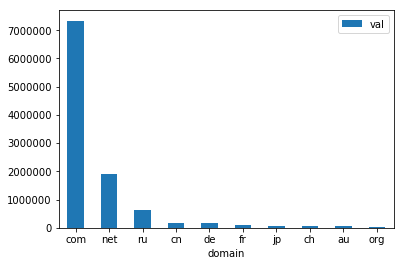

In [16]:
dfplot = pd.DataFrame({'domain':['com', 'net', 'ru','cn','de','fr','jp','ch','au','org'], 'val':[7336833,1898419,630262,154068,153067,85601,70494,59317,46514,45280]})
ax = dfplot.plot.bar(x='domain', y='val', rot=0)

This shows the dataset consists of a maximum of .com(commercial) TLD followed ny .net(network). 

It also shows the distribution of scripts accross different countries with the help of country specific TLDs. It shows .ru is at the top followed by .cn.

## Audio Fingerprinting

An audio fingerprint (also referred to as an acoustic fingerprint) is a compact representation of some audio that encapsulates information that is specific to the audio that it represents. The role of an audio fingerprint is to capture the signature of a piece of sound, such as a song, that allows it to be differentiated from other sounds.

## TLD in the Audio Fingerprinting Scripts
[Refer]() for the code to extract TLD.

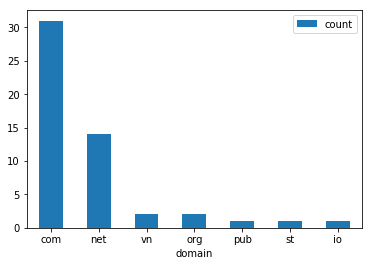

In [12]:

dfplot = pd.DataFrame({'domain':['com', 'net', 'vn','org','pub','st','io'], 'count':[31,14,2,2,1,1,1]})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)

## Canvas Fingerprinting

Canvas fingerprinting is one of a number of browser fingerprinting techniques for tracking online users that allow websites to identify and track visitors using the HTML5 canvas element instead of browser cookies or other similar means. 
As described by Acar et. al. in [The Web never forgets: Persistent tracking mechanisms in the wild](https://securehomes.esat.kuleuven.be/~gacar/persistent/index.html)
Fingerprinting script first draws text with the font and size of its choice and adds background colors (1). Next, the script calls Canvas API’s ToDataURL method to get the canvas pixel data in dataURL format (2), which is basically a Base64 encoded representation of the binary pixel data. Finally, the script takes the hash of the text-encoded pixel data (3), which serves as the fingerprint 

## TLD in the Canvas Fingerprinting Scripts
[Refer]() for the code to extract TLD.

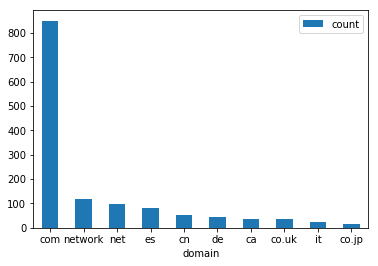

In [13]:

dfplot = pd.DataFrame({'domain':['com','network','net','es', 'cn','de','ca','co.uk','it','co.jp'], 'count':[851,118,96,83,52,44,36,35,23,15]})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)

## Font Fingerprinting 

Font fingerprinting – is what fonts you have, and how they are drawn. Based on measuring dimensions of the filled with text HTML elements, it is possible to build an identifier that can be used to track the same browser over time.

The font is a file used by programs on your device when they want to display a text with a certain shape for the characters. For example, in Windows, the font files are located in the C:WindowsFonts folder.
Your device has a list of fonts that can be used. Standard fonts are those fonts that came with your operating system. But most of the software you installed on your device brings with them other fonts during software installation. The chances of you having the same programs installed on your device as another individual are very small (it’s just like the lottery), so you will have a list of fonts installed that is almost certainly unique.
Because any website you visit can see almost all your list of fonts, this site can recognize you the next time you access it.


Font metric-based fingerprinting is tightly crossed with the canvas fingerprinting. It is probably weaker fingerprinting technique, since canvas gets not only bounding boxes but also pixel data. On the other hand font fingerprinting is much more difficult to defend.



## TLD in the Font Fingerprinting Scripts

[Refer]() for the code to extract TLD.

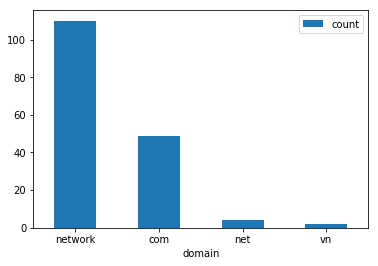

In [14]:

dfplot = pd.DataFrame({'domain':['network','com','net','vn'], 'count':[110,49,4,2]})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)


Unlike others Font fingerprinting shows the .network TLD scripts are the highest contributorsfollowed by .com.

## WebRTC Fingerprinting

[WebRTC](http://randomwalker.info/publications/OpenWPM_1_million_site_tracking_measurement.pdf) is a framework for peer-to-peer Real Time Communication in the browser, and acces-sible via Javascript. To discover the best network path between peers, each peer collects all available candidate addresses, including addresses from the local network interfaces (such as ethernet or WiFi) and addresses from the public side of the NAT and makes them available to the web application without explicit permission from the user.




## TLD in the WebRTC Fingerprinting Scripts
[Refer]() for the code to extract TLD.

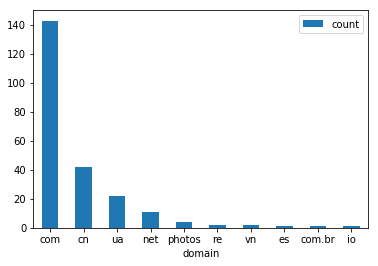

In [15]:

dfplot = pd.DataFrame({'domain':['com','cn','ua','net', 'photos','re','vn','es','com.br','io'], 'count':[143,42,22,11,4,2,2,1,1,1]})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)

It can be seen that highest contributor is .com followed by .cn .ua and .net is followed by them

## Conlusion

The dataset consists of the maximum of .com and .net TLDs and hence audio, canvas fingerprinting show the same. However, font fingerprinting shows the maximum of .net and in webrtcfingerprinting .cn and .ua have gretaer contribution as compared to .net. 
If we consider the ccTLDs 'es', 'cn','de','ca','co.uk','it','co.jp','ua' are contributing towards fingerprinting.

## Future  work

Looking at the TLD provides some insight regarding the associated website such as its objective (business, government, education), its owner, or the geographical area from which it originated.

In order to take the analysis further we can look at the frequency of the extracted fingerprinting scripts in the dataset. Further, we can start by analysing the scripts according to their frequency and try to analyse their behaviour.

Few questions which can be given a thought during the analysis.

- Is the script contributing to fingerprinting everytime it is called or there are specific instances?
- Is the script helping to establish a crossbrowser fingerprint? 
- Or a broader question, Are there any other privacy concerns while that script is executing, maybe in terms of the information it is targeting.








